In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

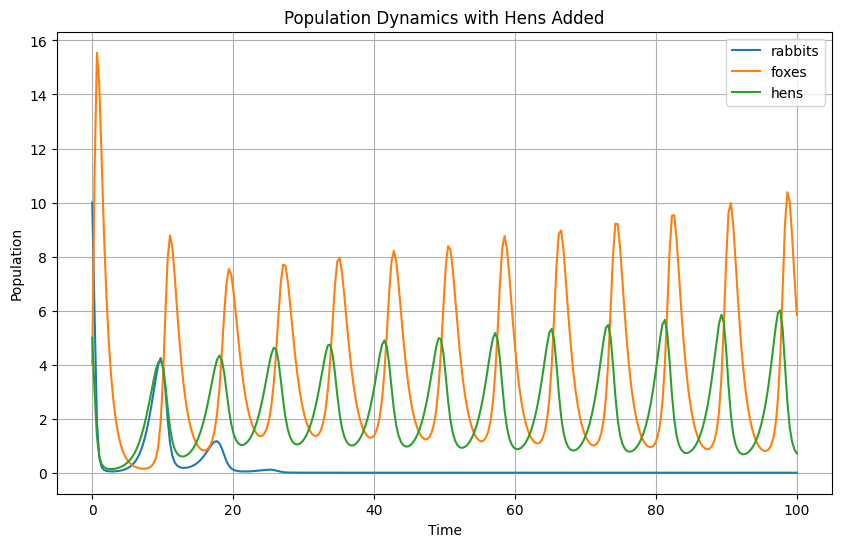

Rabbit : Min = -0.00 | Max 10.00
Fox    : Min = 0.15 | Max 15.55
Hen    : Min = 0.14 | Max 6.01


In [17]:
def gLV(t,x_t, r, A, K):
    """
        t   -> Time step required by solve_ivp
        x_t -> Population at time t: (N,)
        r   -> Intrinsic growth rate: (N,)
        A   -> Interacion Coefficient: (N,N)
        K   -> Carrying Capacities: (N,)

        Returns:
        dx/dt -> Change in population: (N,)
    """

    return x_t * (r * (1 - x_t / K) + A @ x_t)



Nt=300
tmax=100
t=np.linspace(0., tmax, Nt)


# Initial populations for rabbits, foxes, and hens
x0 = np.array([10, 4, 5])  # Start with 10 rabbits, 4 foxes, and 5 hens

# Growth rates
r = np.array([1, -1.0, 0.75])  # Growth for rabbits, decay for foxes, growth for hens

# Interaction matrix (rabbits, foxes, hens)
A = np.array([
    [0, -0.3, -0.1],  # Rabbits decrease by foxes and hens
    [0.3, 0, 0.4],    # Foxes grow by eating rabbits and hens
    [-0.1, -0.2, 0]   # Hens decrease by foxes, slightly interact with rabbits
])

# Carrying capacities for each species (Max Num Environment can support)
K = np.array([10000, 200, 300])

# Species names
species = ['rabbits', 'foxes', 'hens']

# Solving the system of ODEs
sol = integrate.solve_ivp(gLV, [0, tmax], x0, args=(r, A, K), method='BDF', t_eval=t)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(sol.t, sol.y[i], label=species[i])

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics with Hens Added')
plt.legend()
plt.grid(True)
plt.show()

# Print statistics
print(f"""Rabbit : Min = {np.min(sol.y[0]):.2f} | Max {np.max(sol.y[0]):.2f}
Fox    : Min = {np.min(sol.y[1]):.2f} | Max {np.max(sol.y[1]):.2f}
Hen    : Min = {np.min(sol.y[2]):.2f} | Max {np.max(sol.y[2]):.2f}""")

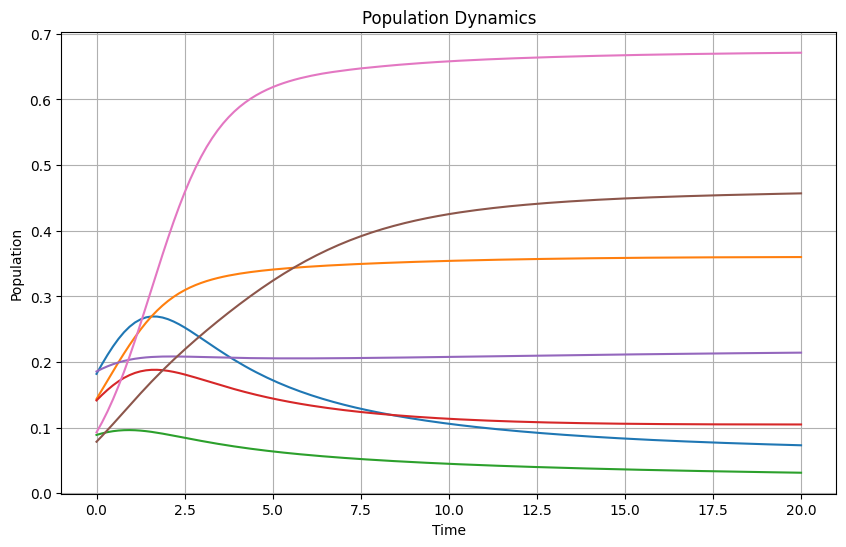

Rabbit : Min = 0.07 | Max 0.27
Fox    : Min = 0.14 | Max 0.36
Hen    : Min = 0.03 | Max 0.10


In [302]:
Nt=129
tmax=20
t=np.linspace(0., tmax, Nt)


N = 7

A = -np.random.uniform(-0.2, 1, (N, N))

# Modify diagonal elements
np.fill_diagonal(A, np.diag(A) - np.sqrt(2))

r = np.random.uniform(0,1,N) + 0.5

K = np.ones(N)*1000
x0 = np.random.uniform(0.05, 0.2, N)


sol = integrate.solve_ivp(gLV, [0, tmax], x0, args=(r, A, K), method='BDF', t_eval=t)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(sol.t, sol.y[i], label=f'Species {i}')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics')
#plt.legend()
plt.grid(True)
plt.show()

# Print statistics
print(f"""Rabbit : Min = {np.min(sol.y[0]):.2f} | Max {np.max(sol.y[0]):.2f}
Fox    : Min = {np.min(sol.y[1]):.2f} | Max {np.max(sol.y[1]):.2f}
Hen    : Min = {np.min(sol.y[2]):.2f} | Max {np.max(sol.y[2]):.2f}""")